<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/election/EDA_boston_nyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [4]:
import os 
import time 

%matplotlib inline
# import mpld3
# mpld3.enable_notebook()
from tqdm import tqdm
import time 

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from math import radians, sin, cos, sqrt, asin

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import *

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

import statsmodels.api as sm
from scipy import stats

#from geopy.distance import geodesic
#from geopy.geocoders import Nominatim

#from simpledbf import Dbf5
#import shapefile as shp

#import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_ROOT = '/content/drive/My Drive/Final-Project-for-CS109a/Milestone3/'
boston_df = pd.read_csv(DATA_ROOT+'boston_crime_analysis_data_final.csv',encoding = 'unicode_escape')
nyc_df = pd.read_csv(DATA_ROOT+'nyc_crime_analysis_data_final.csv',encoding = 'unicode_escape')

In [6]:
nyc_df.head()

Unnamed: 0   AREA  YEAR  MONTH  ... SNOW  NIGHT  OFFENSE_TYPE  VIOLENT_CRIME
0           0  BRONX  2020      8  ...  0.0      1    Harassment              0
1           1  BRONX  2020      9  ...  0.0      0    Harassment              0
2           2  BRONX  2020      9  ...  0.0      0    Harassment              0
3           3  BRONX  2020      9  ...  0.0      0    Harassment              0
4           4  BRONX  2020      9  ...  0.0      1    Harassment              0

[5 rows x 26 columns]

In [7]:
boston_df.head()

Unnamed: 0 AREA  YEAR  MONTH  ... SNOW  NIGHT  OFFENSE_TYPE  VIOLENT_CRIME
0           0   B3  2019     11  ...  0.0    0.0         Other              0
1           1  E18  2019     11  ...  0.0    0.0         Other              0
2           2   A1  2019     11  ...  0.0    1.0       Warrant              0
3           3   A1  2020      1  ...  0.0    1.0         Other              0
4           4   D4  2020      1  ...  0.0    1.0         Other              0

[5 rows x 26 columns]

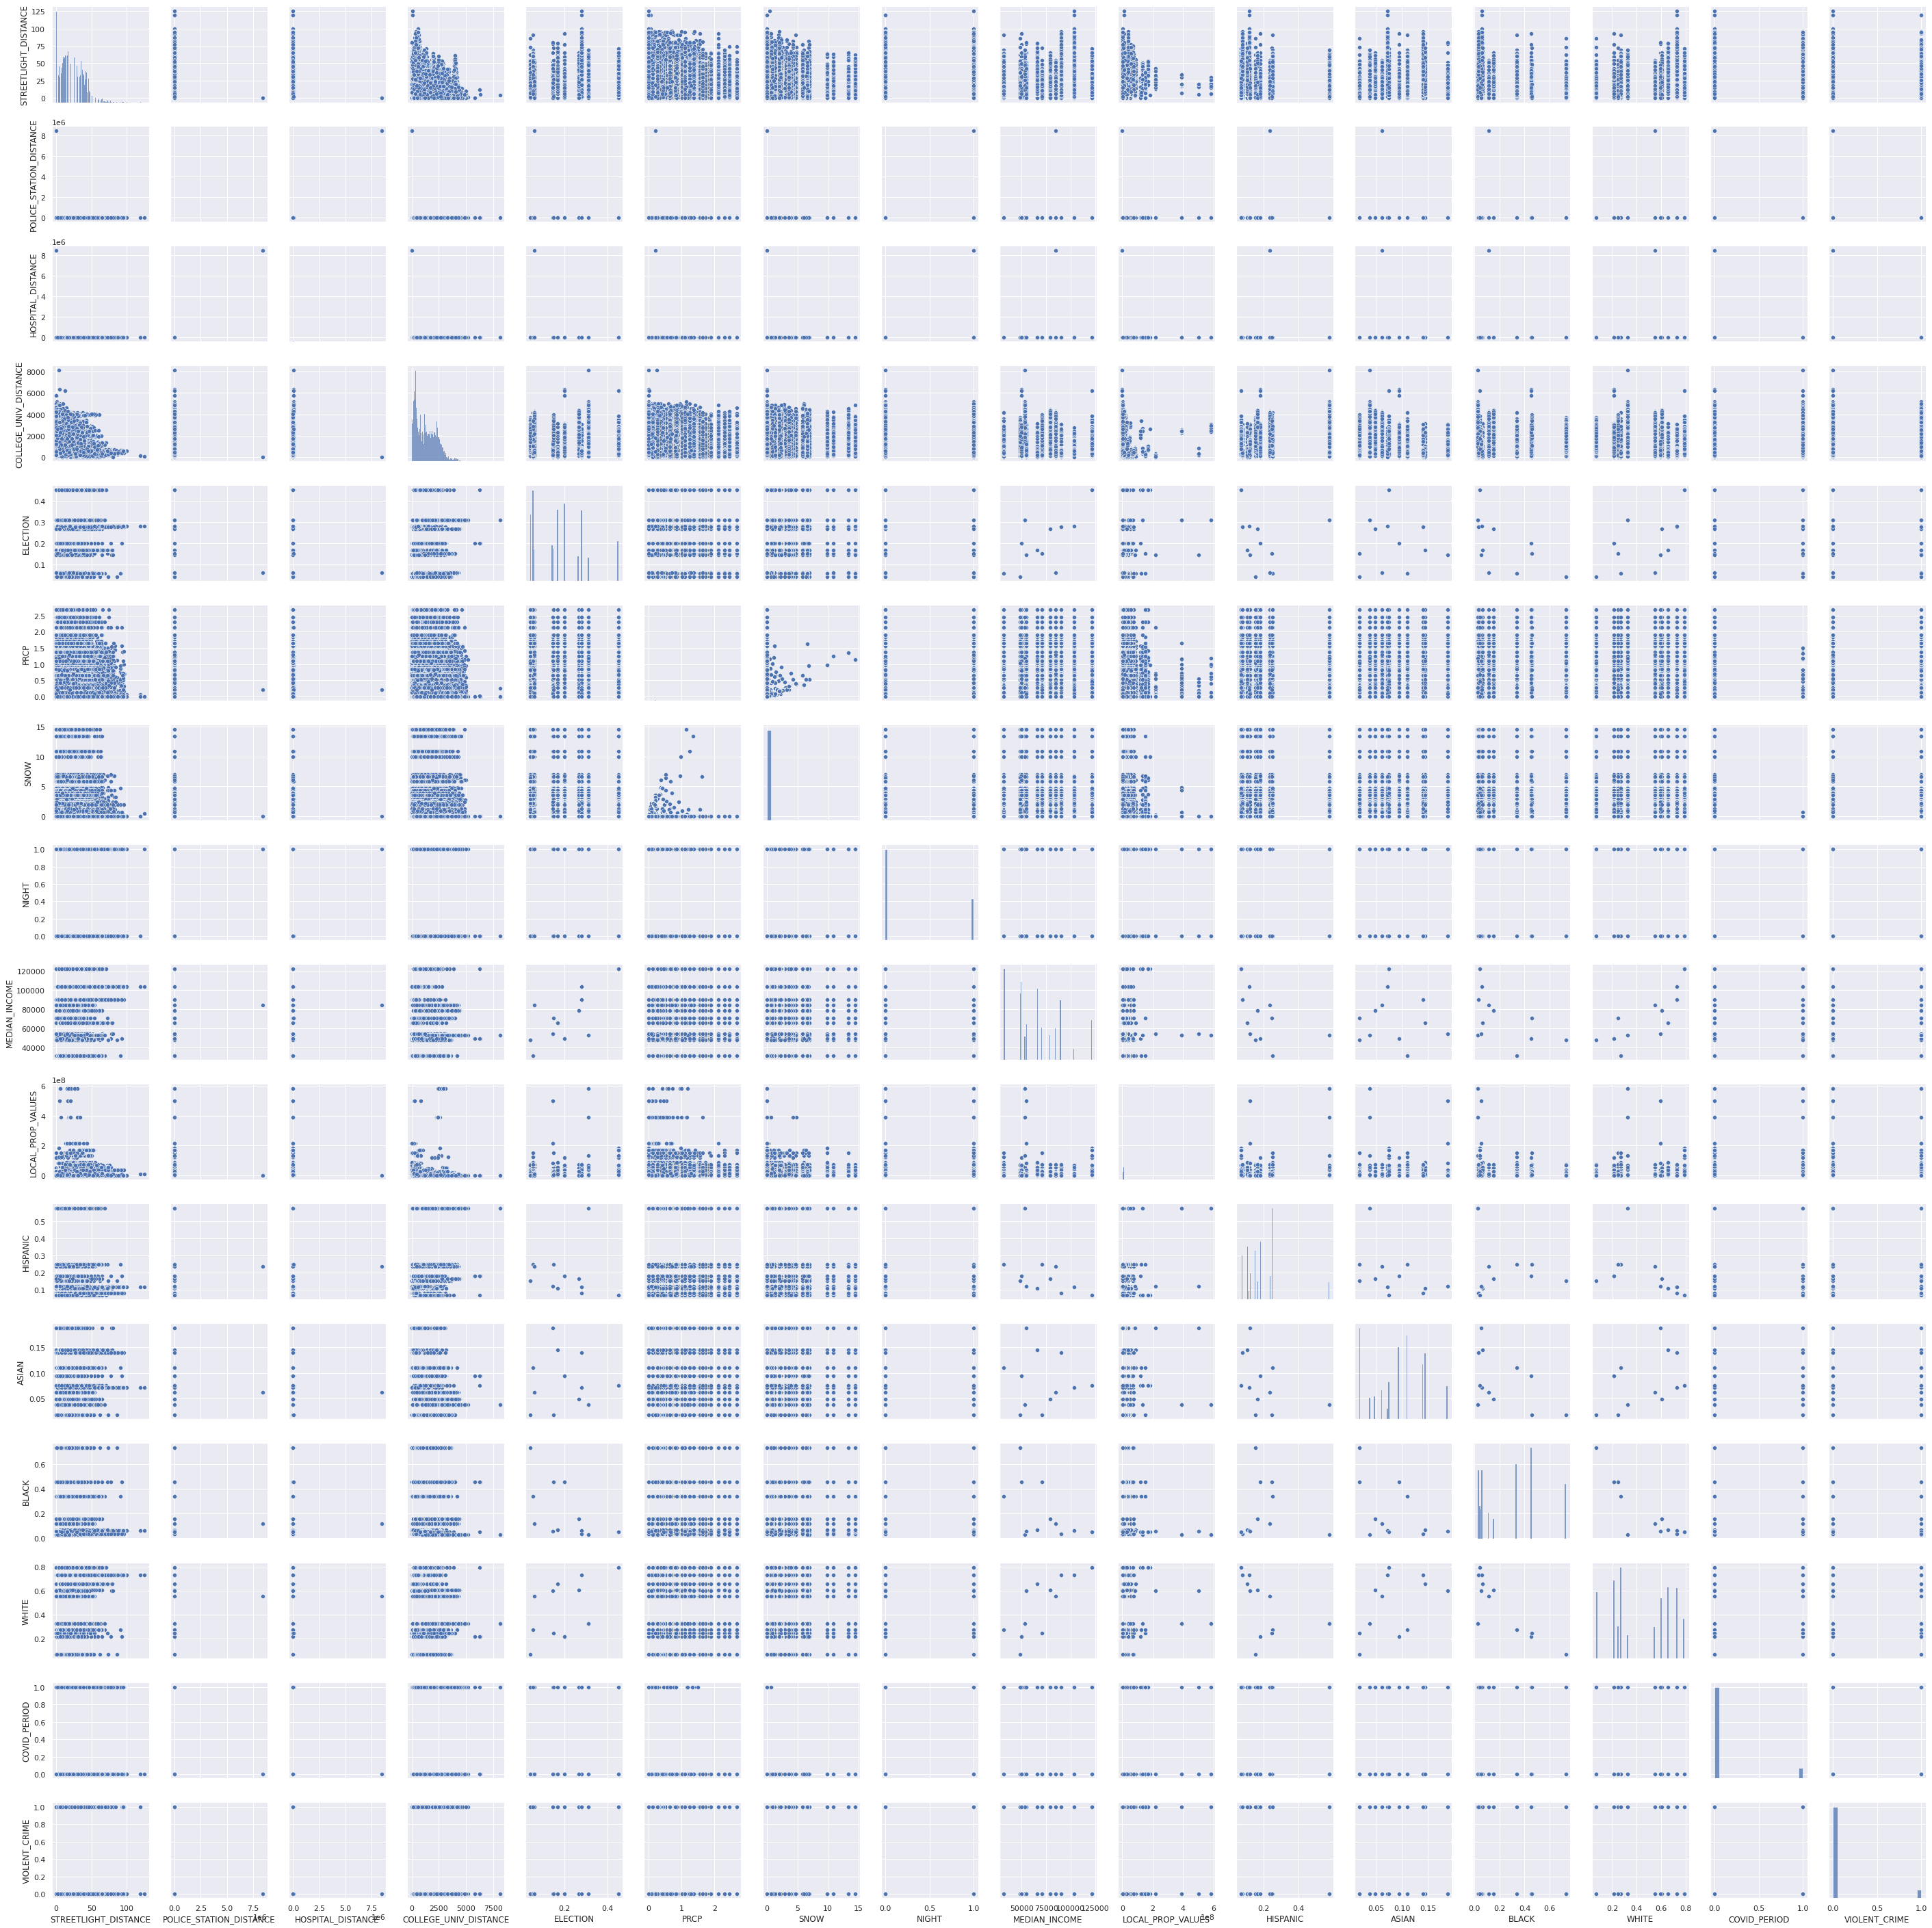

In [18]:
sns.pairplot(boston_df[['STREETLIGHT_DISTANCE','POLICE_STATION_DISTANCE','HOSPITAL_DISTANCE','COLLEGE_UNIV_DISTANCE','ELECTION','PRCP','SNOW','NIGHT','OFFENSE_TYPE','MEDIAN_INCOME','LOCAL_PROP_VALUES','HISPANIC','ASIAN','BLACK','WHITE','COVID_PERIOD',"VIOLENT_CRIME"]])
plt.show()

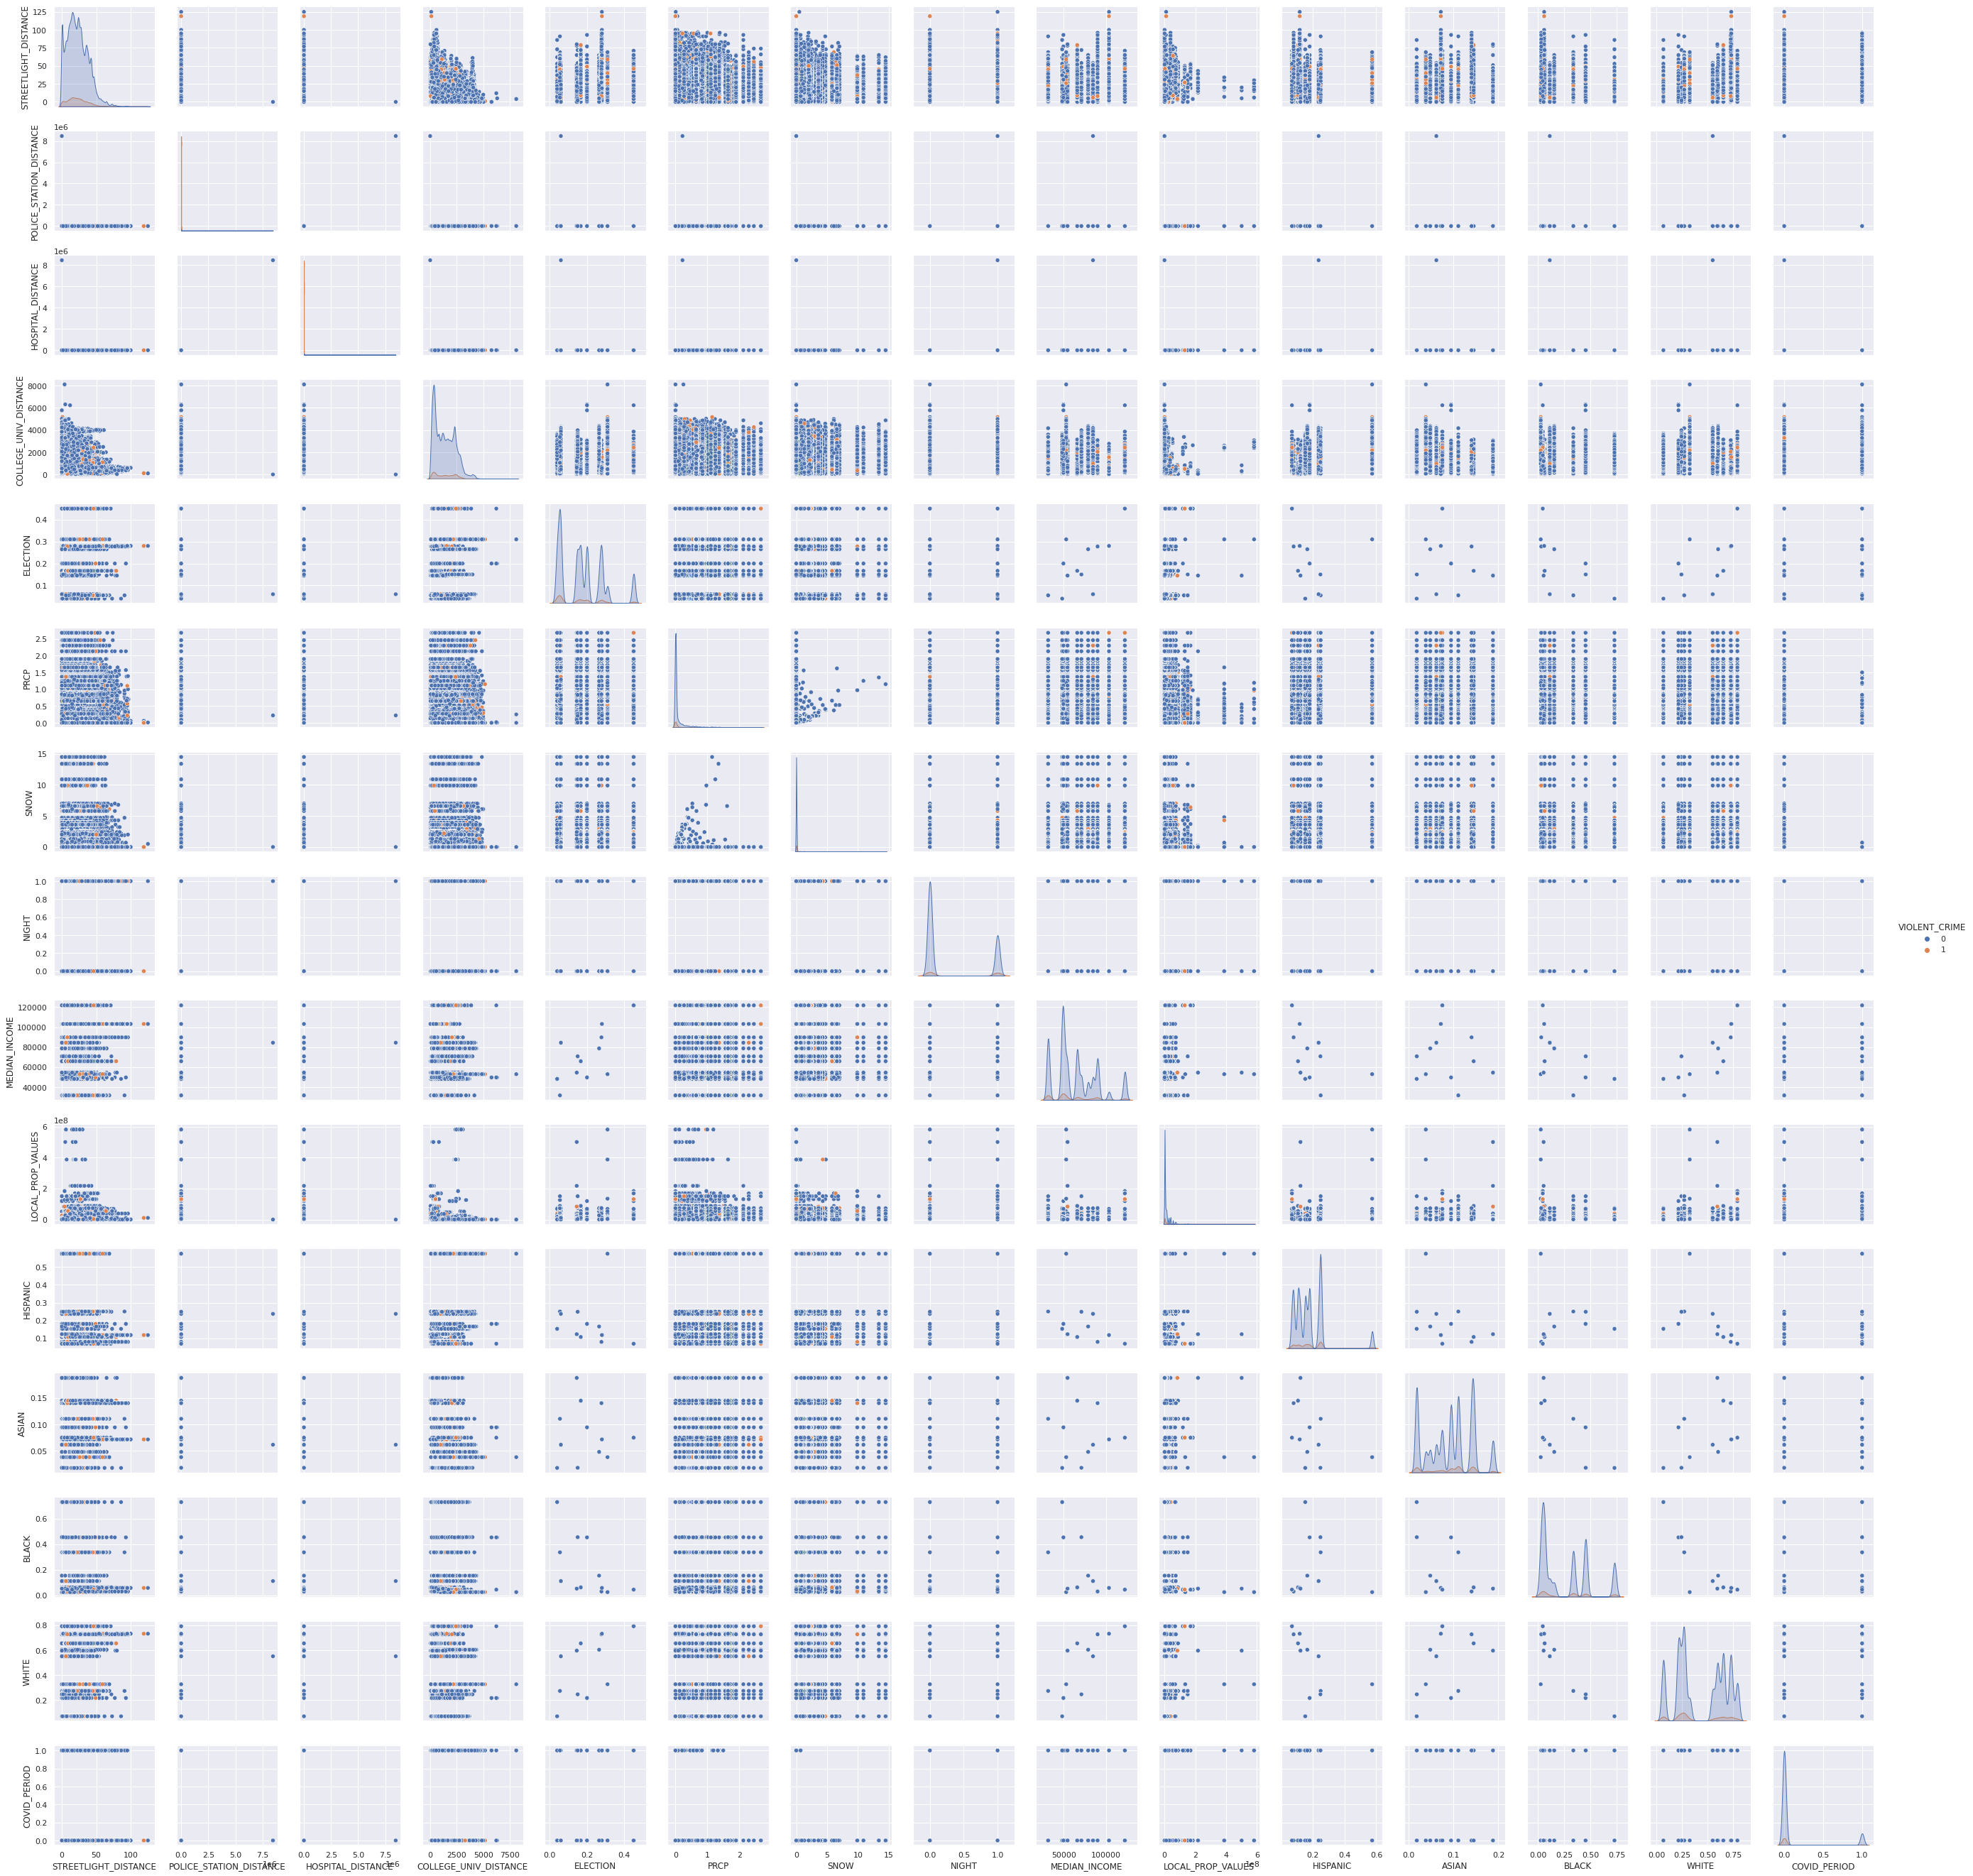

In [70]:
sns.pairplot(boston_df[['STREETLIGHT_DISTANCE','POLICE_STATION_DISTANCE','HOSPITAL_DISTANCE','COLLEGE_UNIV_DISTANCE','ELECTION','PRCP','SNOW','NIGHT','OFFENSE_TYPE','MEDIAN_INCOME','LOCAL_PROP_VALUES','HISPANIC','ASIAN','BLACK','WHITE','COVID_PERIOD',"VIOLENT_CRIME"]],hue='VIOLENT_CRIME')
plt.show()

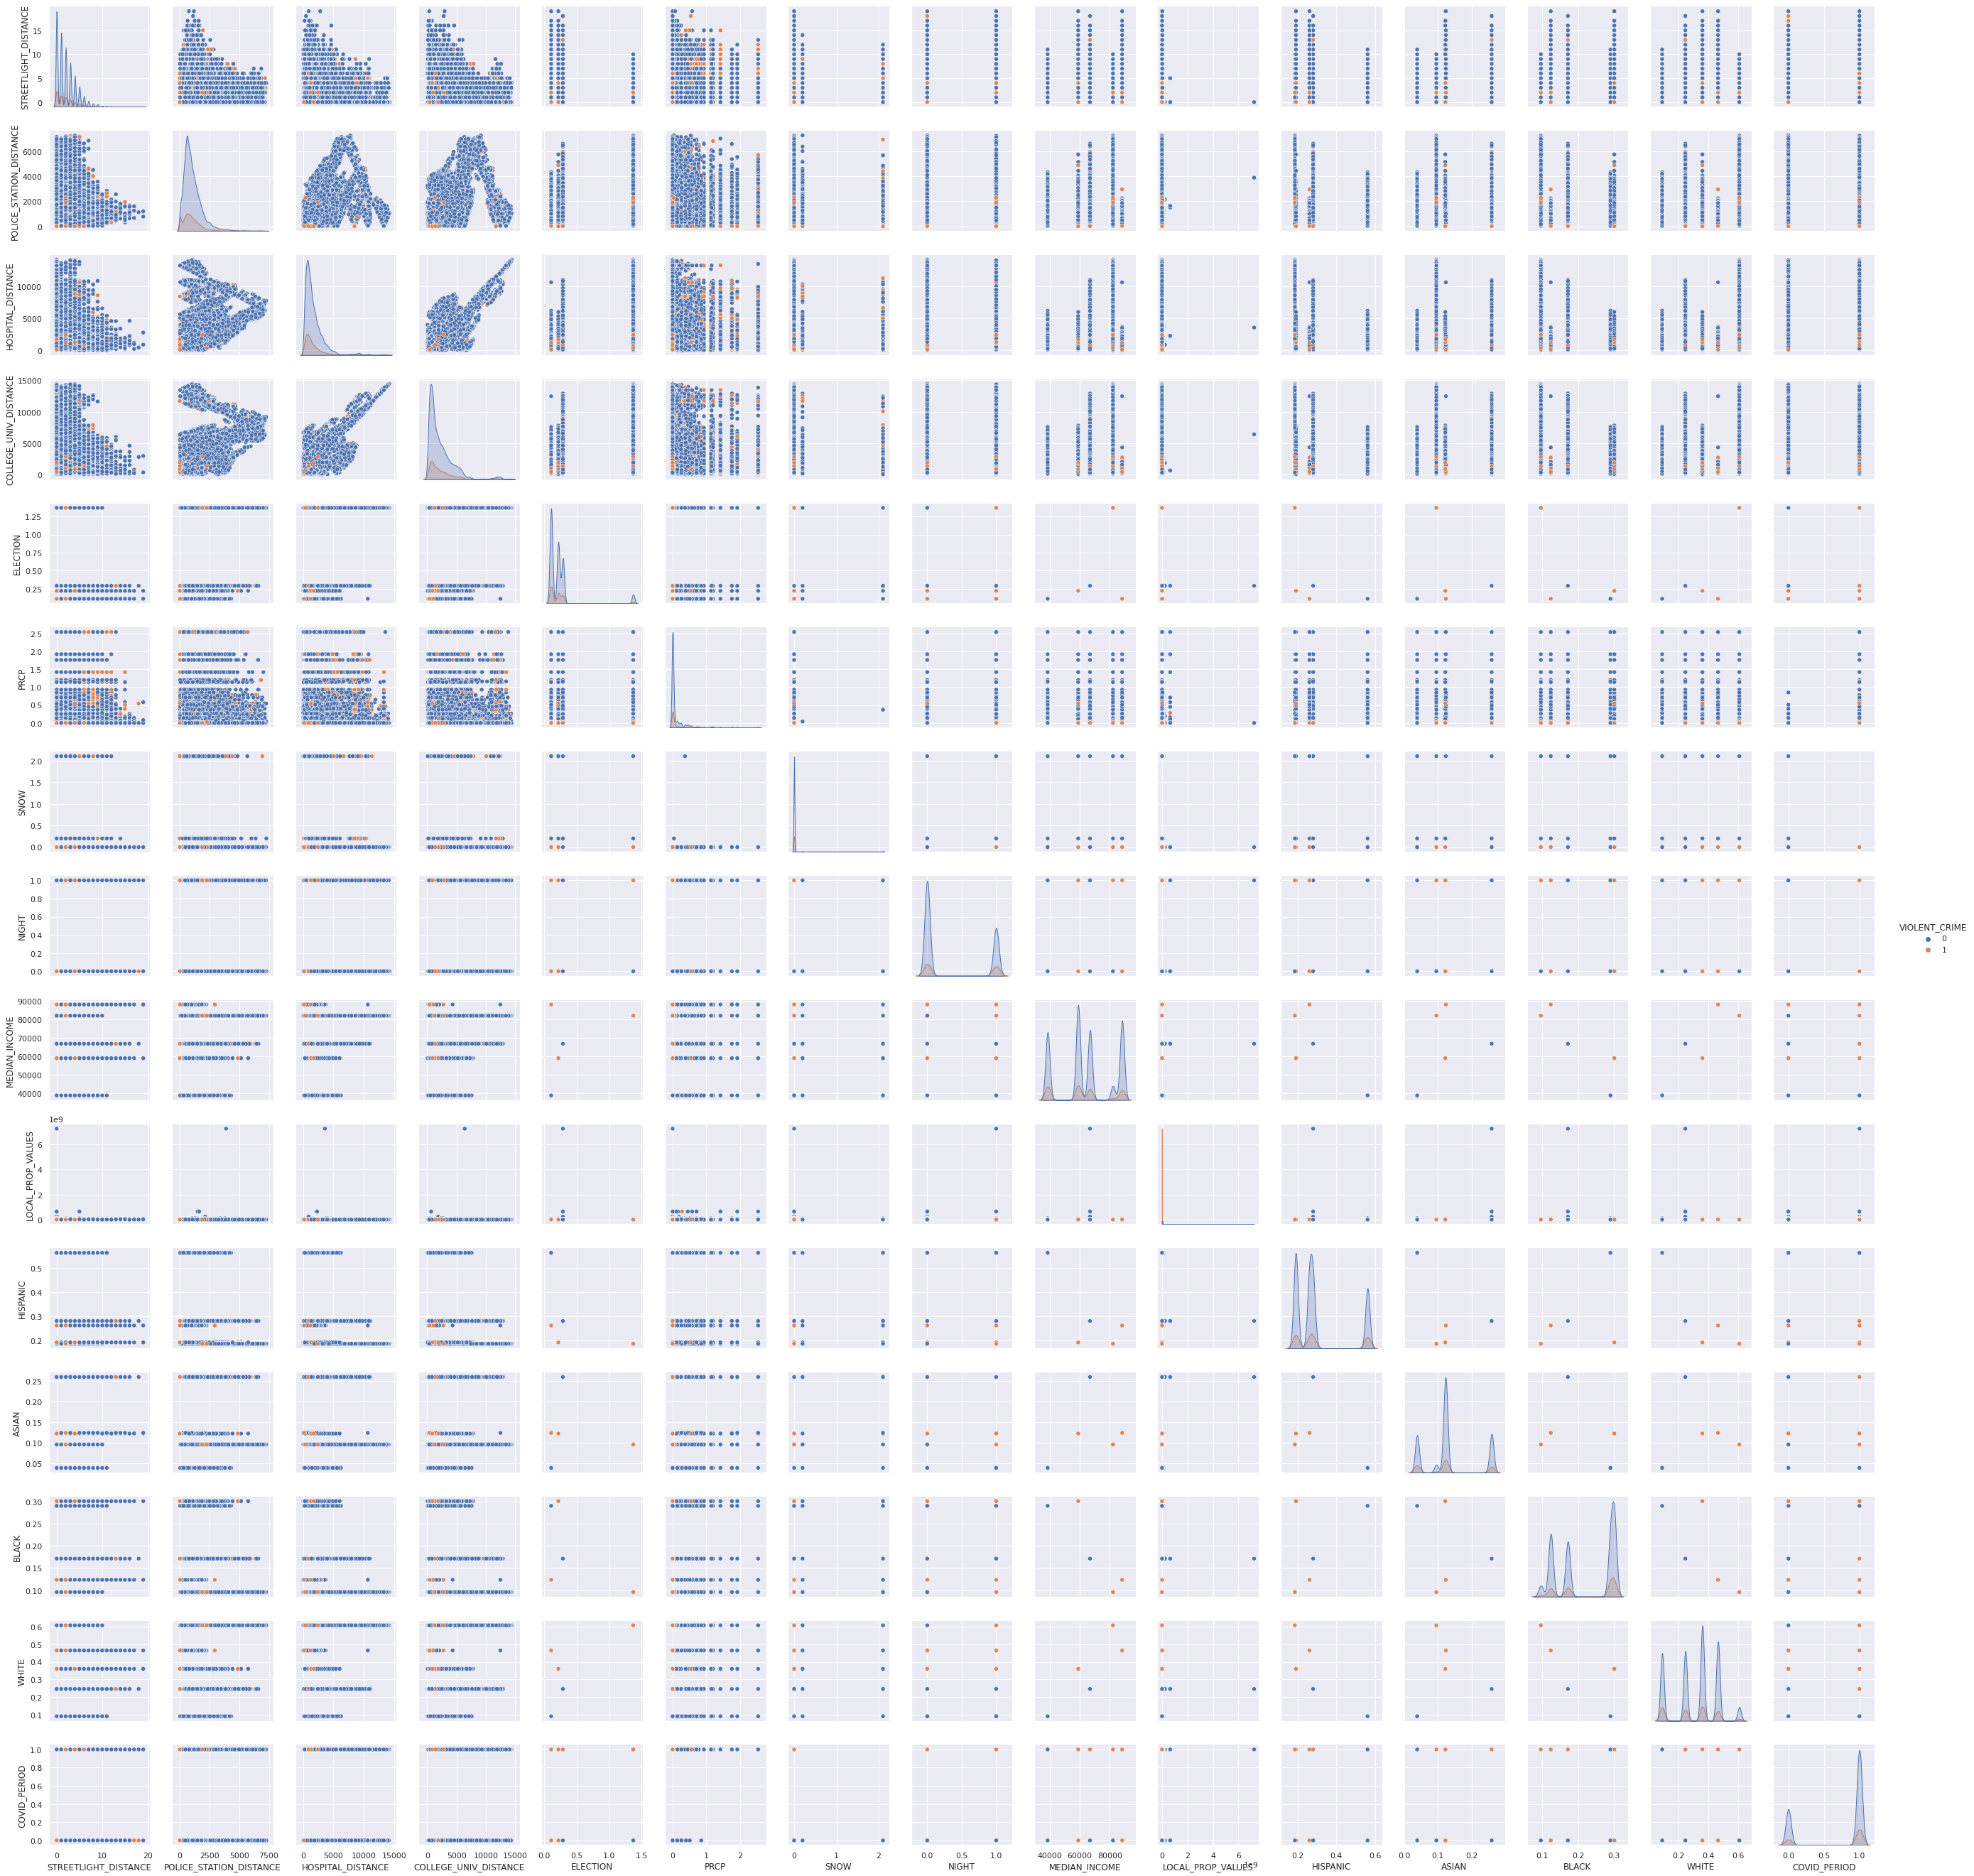

In [71]:
sns.pairplot(nyc_df[['STREETLIGHT_DISTANCE','POLICE_STATION_DISTANCE','HOSPITAL_DISTANCE','COLLEGE_UNIV_DISTANCE','ELECTION','PRCP','SNOW','NIGHT','OFFENSE_TYPE','MEDIAN_INCOME','LOCAL_PROP_VALUES','HISPANIC','ASIAN','BLACK','WHITE','COVID_PERIOD',"VIOLENT_CRIME"]],hue='VIOLENT_CRIME')
plt.show()

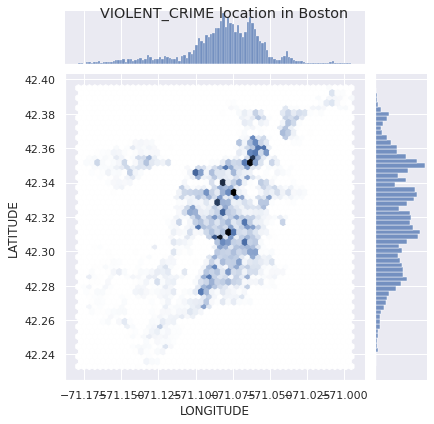

In [51]:
#use in the final notebook 
Violent =boston_df.loc[boston_df['VIOLENT_CRIME']== 1]
sns.jointplot(x='LONGITUDE',y='LATITUDE',data=Violent,kind='hex')
plt.suptitle('VIOLENT_CRIME location in Boston')
plt.show()

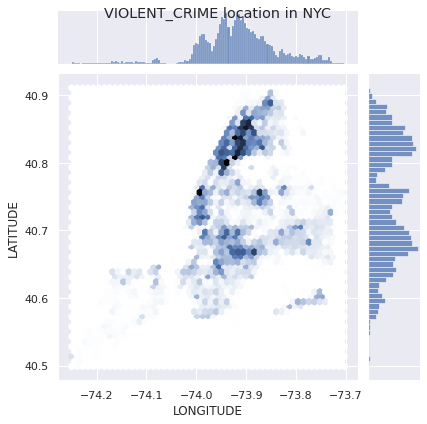

In [49]:
#use in the final notebook 
Violent =nyc_df.loc[nyc_df['VIOLENT_CRIME']== 1]
sns.jointplot(x='LONGITUDE',y='LATITUDE',data=Violent,kind='hex')
plt.suptitle('VIOLENT_CRIME location in NYC')
plt.show()

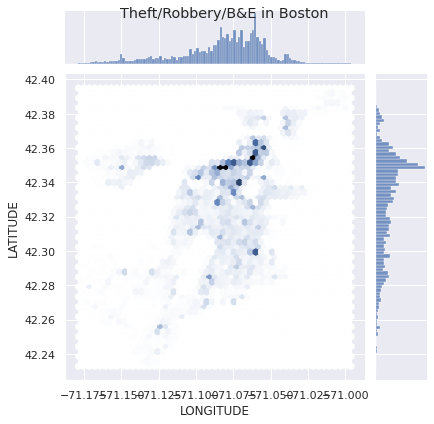

In [16]:
# Showing where most of the theft is hapening, 
Violent =boston_df.loc[boston_df['OFFENSE_TYPE']== 'Theft/Robbery/B&E']
sns.jointplot(x='LONGITUDE',y='LATITUDE',data=Violent,kind='hex')
plt.suptitle('Theft/Robbery/B&E in Boston')
plt.show()

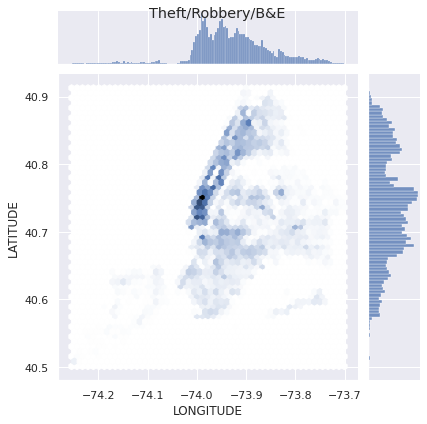

In [14]:
# Showing where most of the theft is hapening, 
Violent =nyc_df.loc[nyc_df['OFFENSE_TYPE']== 'Theft/Robbery/B&E']
sns.jointplot(x='LONGITUDE',y='LATITUDE',data=Violent,kind='hex')
plt.suptitle('Theft/Robbery/B&E in NYC')
plt.show()

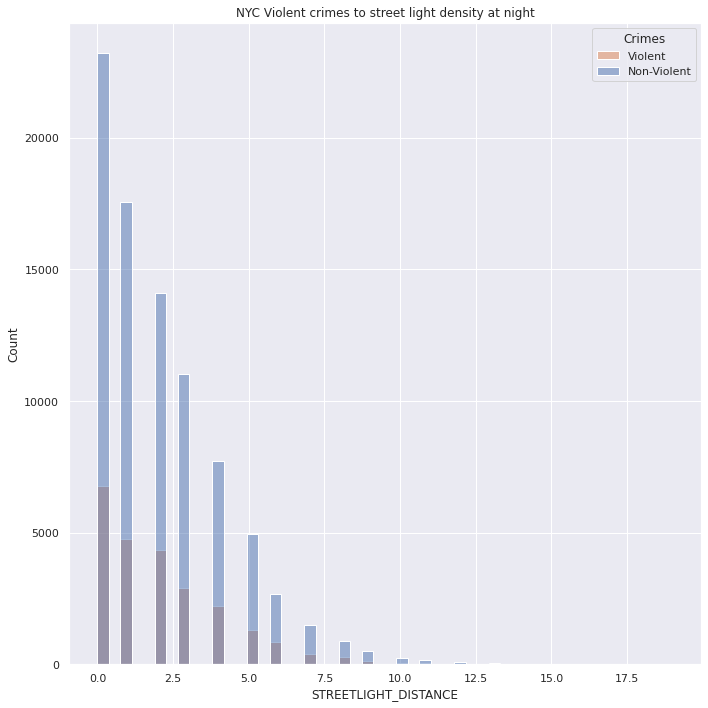

In [76]:
interaction_night_nyc=nyc_df[nyc_df.NIGHT == 1]['STREETLIGHT_DISTANCE']
interaction_night_crime_nyc=nyc_df[nyc_df.NIGHT == 1]['VIOLENT_CRIME']
fig, ax = plt.subplots(1,figsize=(10,10),sharey=False)
sns.histplot(nyc_df,x=interaction_night_nyc, color='y', ax=ax , hue=interaction_night_crime_nyc,bins=50,legend=False)
ax.set_title('NYC Violent crimes to street light density at night')
plt.legend(title='Crimes', loc='upper right', labels=['Violent', 'Non-Violent'])
plt.tight_layout()
plt.show()

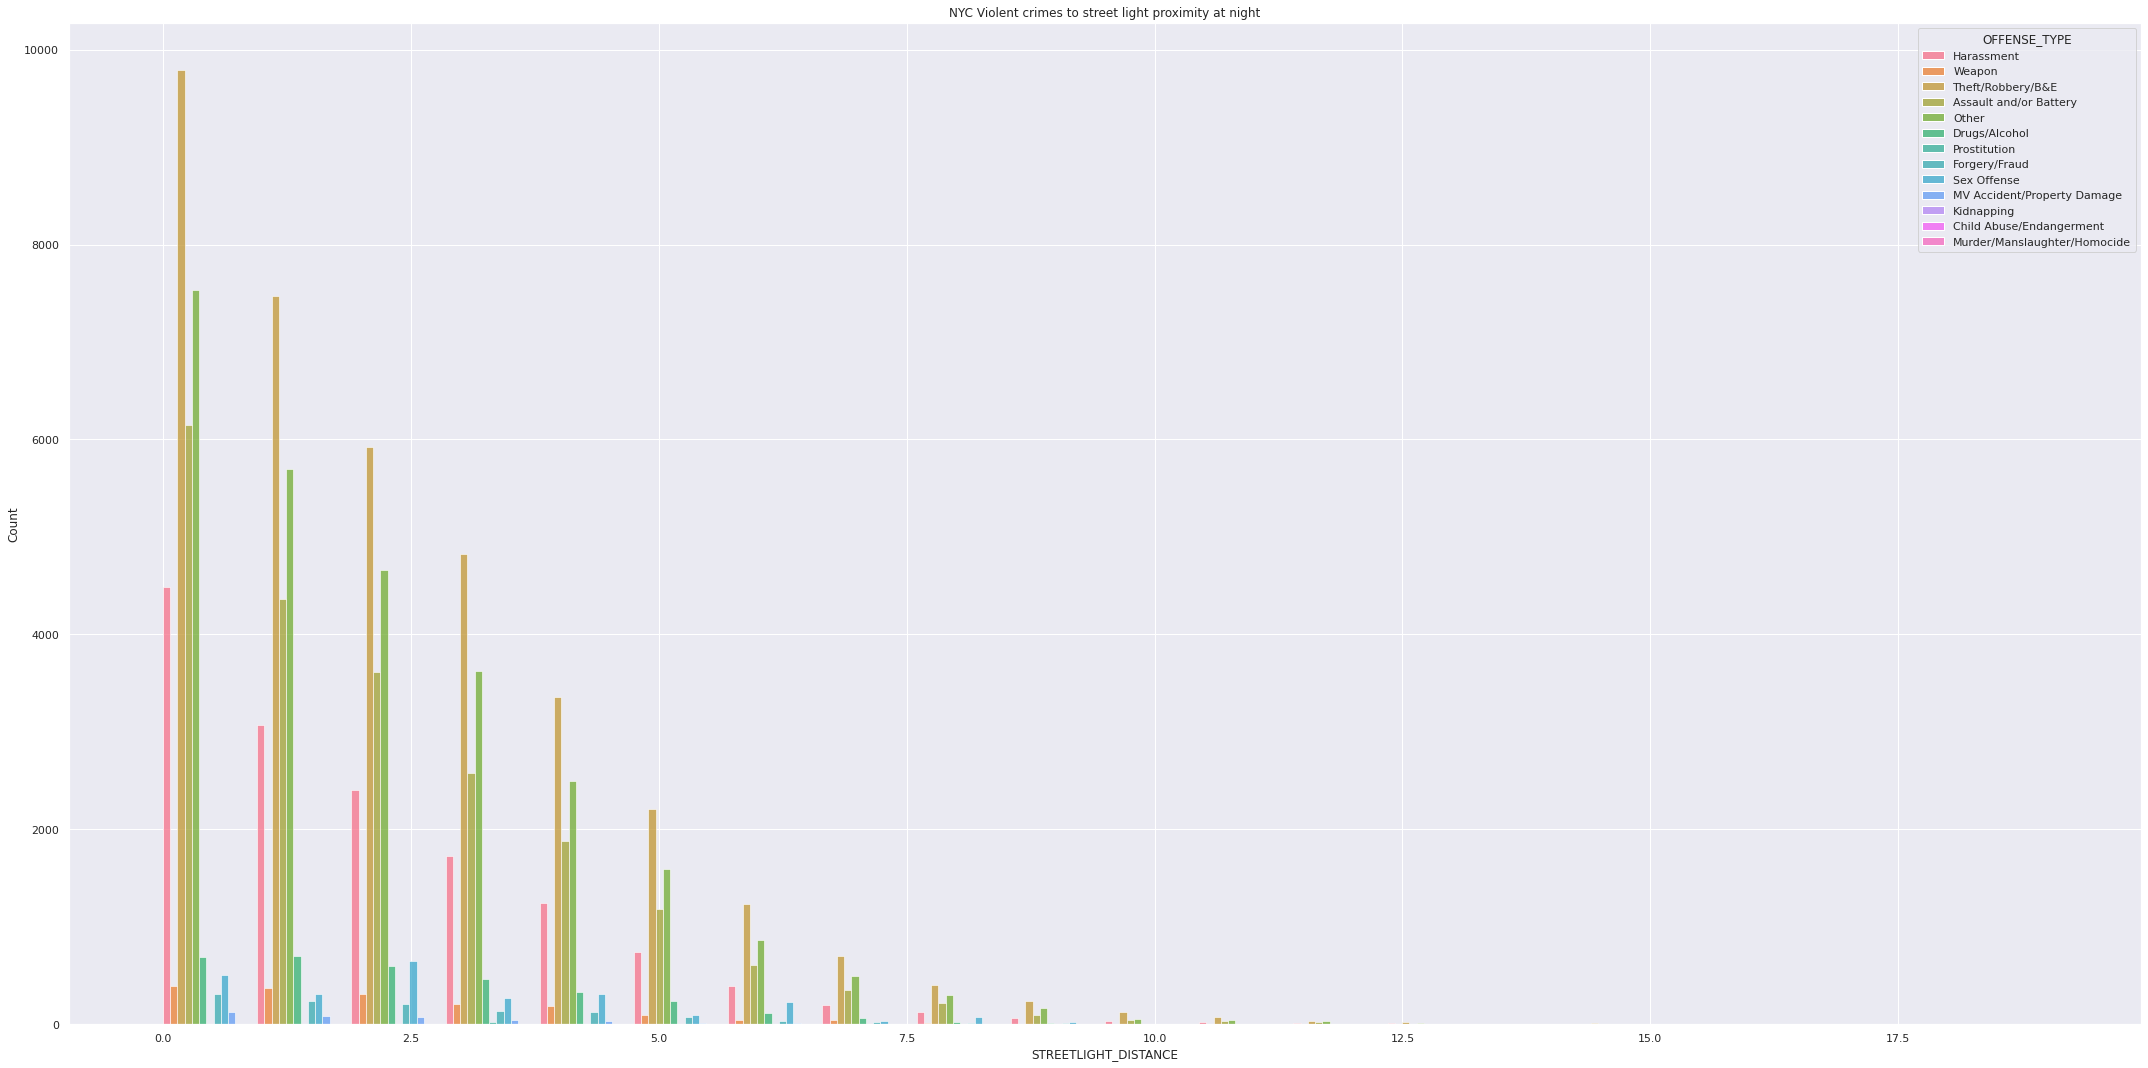

In [77]:
#use in the final notebook 
import matplotlib.ticker as ticker
interaction_night_nyc=nyc_df[nyc_df.NIGHT == 1]['STREETLIGHT_DISTANCE']
night_offence_nyc=nyc_df[nyc_df.NIGHT == 1]['OFFENSE_TYPE']
fig, ax = plt.subplots(1,figsize=(30,15),sharey=False)
sns.histplot(nyc_df,x=interaction_night_nyc, color='y', ax=ax ,multiple="dodge", hue=night_offence_nyc ,bins=20)
#plt.xticks([0,1],['Non-Violent','Violent'],fontsize=14)
ax.set_title('NYC Violent crimes to street light proximity at night')
plt.tight_layout()
plt.show()

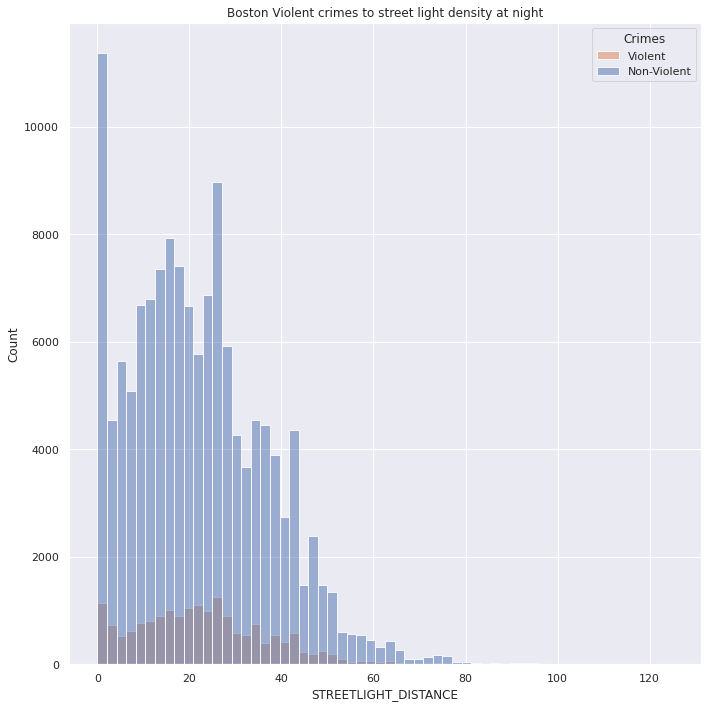

In [89]:
interaction_night_boston=boston_df[boston_df.NIGHT == 1]['STREETLIGHT_DISTANCE']
interaction_night_crime_boston=boston_df[boston_df.NIGHT == 1]['VIOLENT_CRIME']
fig, ax = plt.subplots(1,figsize=(10,10),sharey=False)
sns.histplot(boston_df,x=interaction_night_boston, color='y', ax=ax , hue=interaction_night_crime_boston,bins=60)
ax.set_title('Boston Violent crimes to street light density at night')
plt.legend(title='Crimes', loc='upper right', labels=['Violent', 'Non-Violent'])
plt.tight_layout()
plt.show()

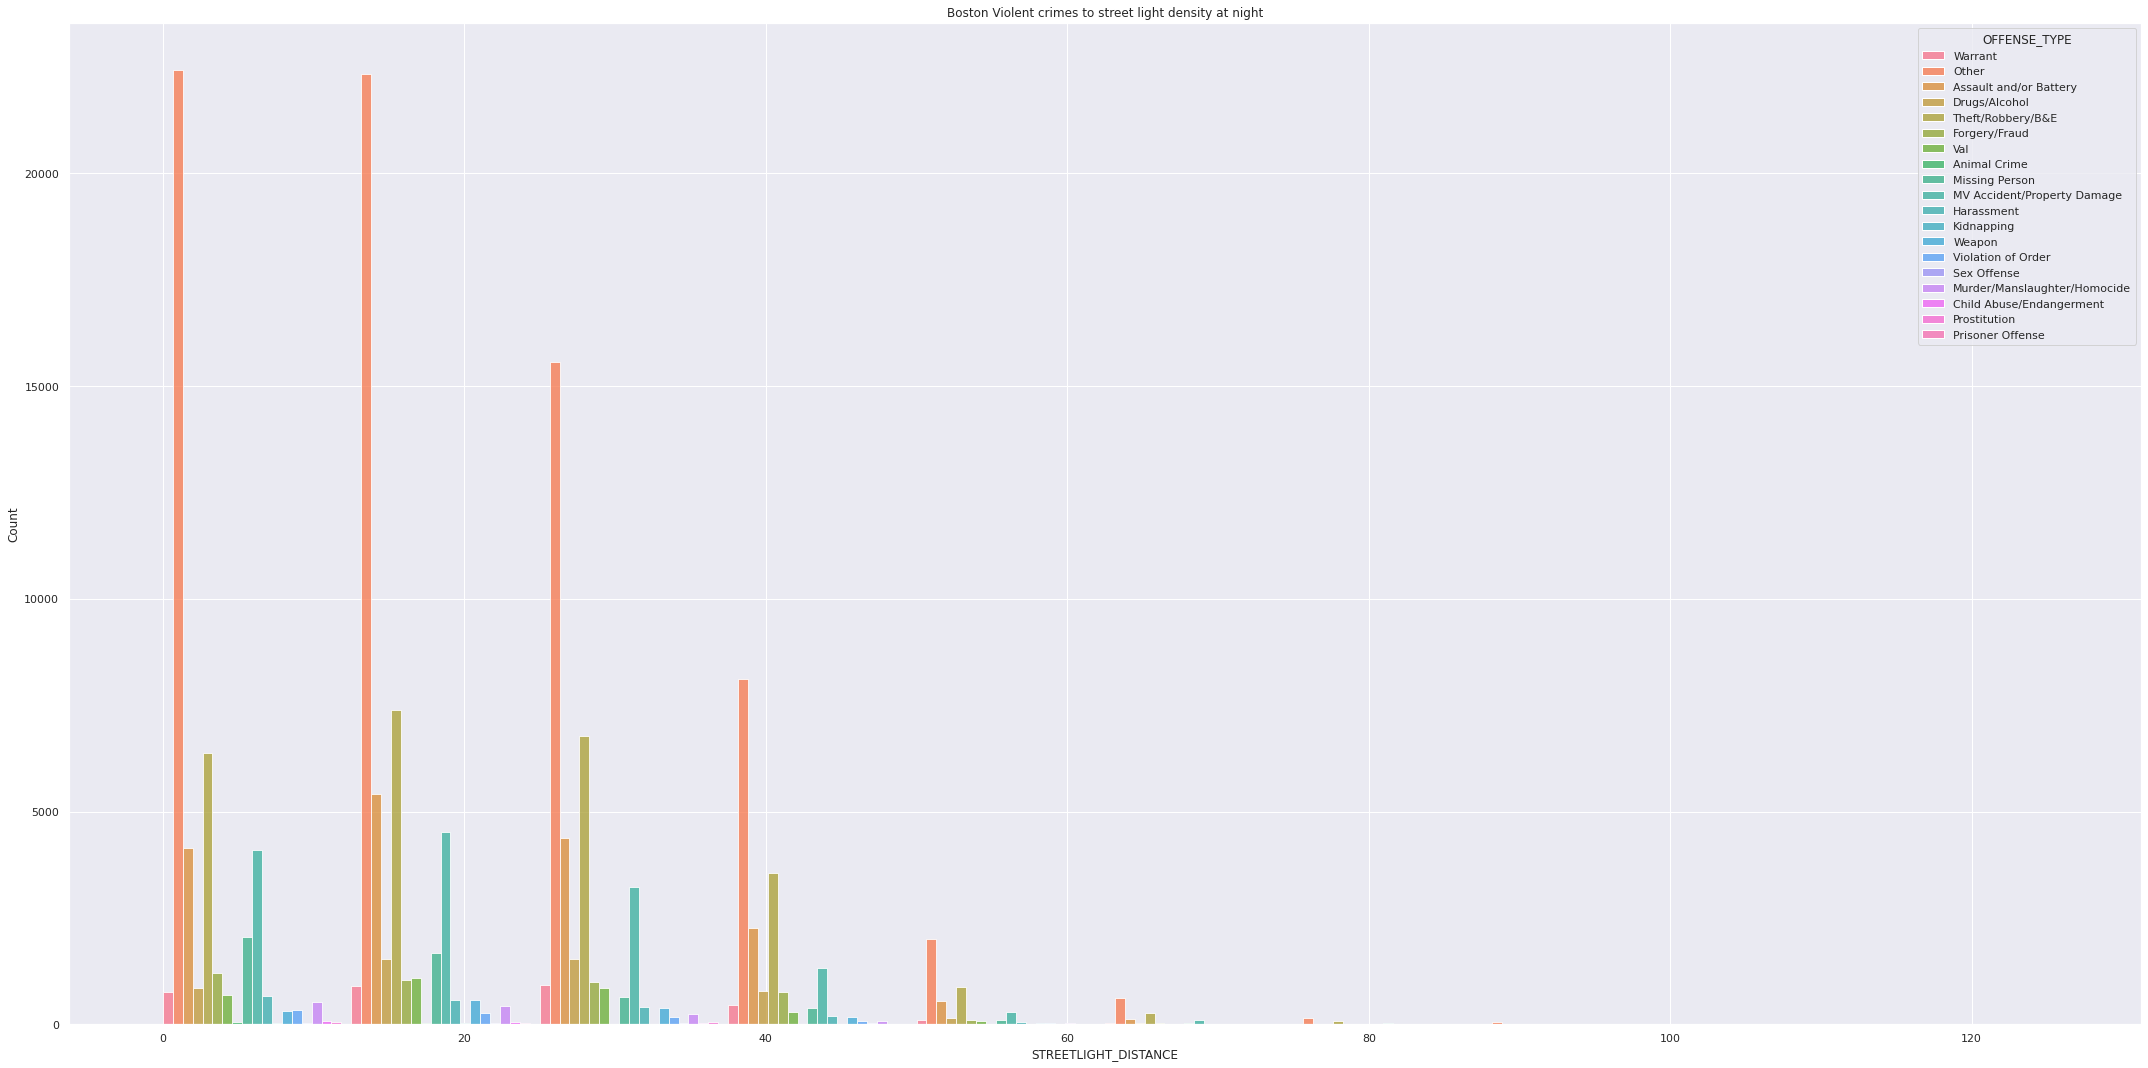

In [80]:
#use in the final notebook 

interaction_night_boston=boston_df[boston_df.NIGHT == 1]['STREETLIGHT_DISTANCE']
night_offence_boston=boston_df[boston_df.NIGHT == 1]['OFFENSE_TYPE']

fig, ax = plt.subplots(1,figsize=(30,15),sharey=False)

sns.histplot(boston_df,x=interaction_night_boston, ax=ax ,multiple="dodge", hue=night_offence_boston,bins=10)

ax.set_title('Boston Violent crimes to street light density at night')
plt.tight_layout()
plt.show()

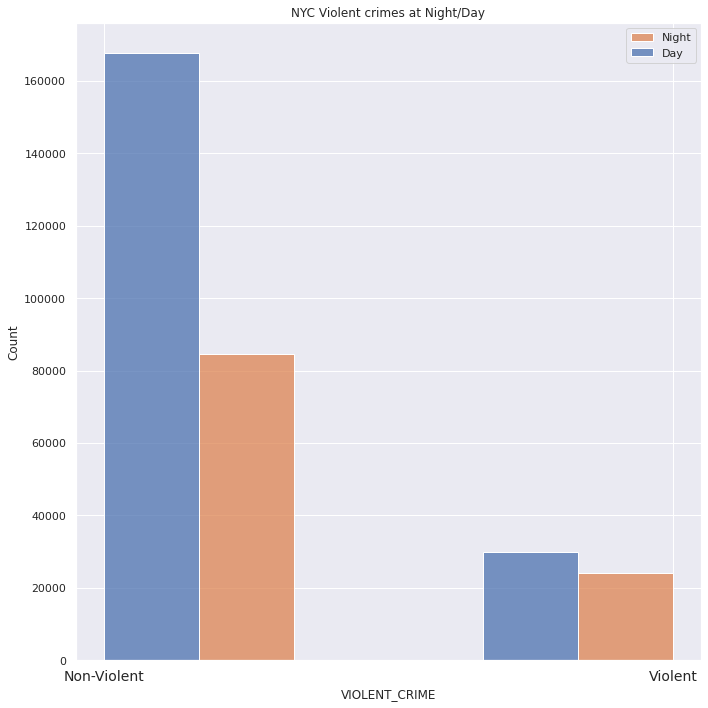

In [92]:
#use in the final notebook 
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(10,10),sharey=False)
sns.histplot(nyc_df,x='VIOLENT_CRIME', color='y', ax=ax , hue="NIGHT",multiple="dodge",bins=3)
plt.xticks([0,1],['Non-Violent','Violent'],fontsize=14)
ax.set_title('NYC Violent crimes at Night/Day')
plt.legend(loc='upper right', labels=['Night','Day'])
plt.tight_layout()
plt.show()

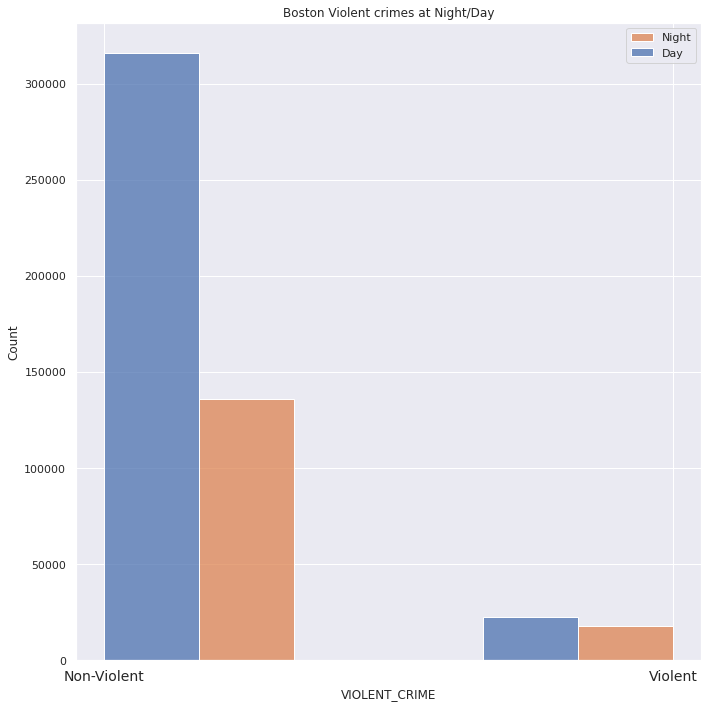

In [95]:
fig, ax = plt.subplots(1,figsize=(10,10),sharey=False)
sns.histplot(boston_df,x='VIOLENT_CRIME', color='y', ax=ax , hue="NIGHT",multiple="dodge",bins=3)
plt.xticks([0,1],['Non-Violent','Violent'],fontsize=14)
ax.set_title('Boston Violent crimes at Night/Day')
plt.legend(loc='upper right', labels=['Night','Day'])
plt.tight_layout()
plt.show()

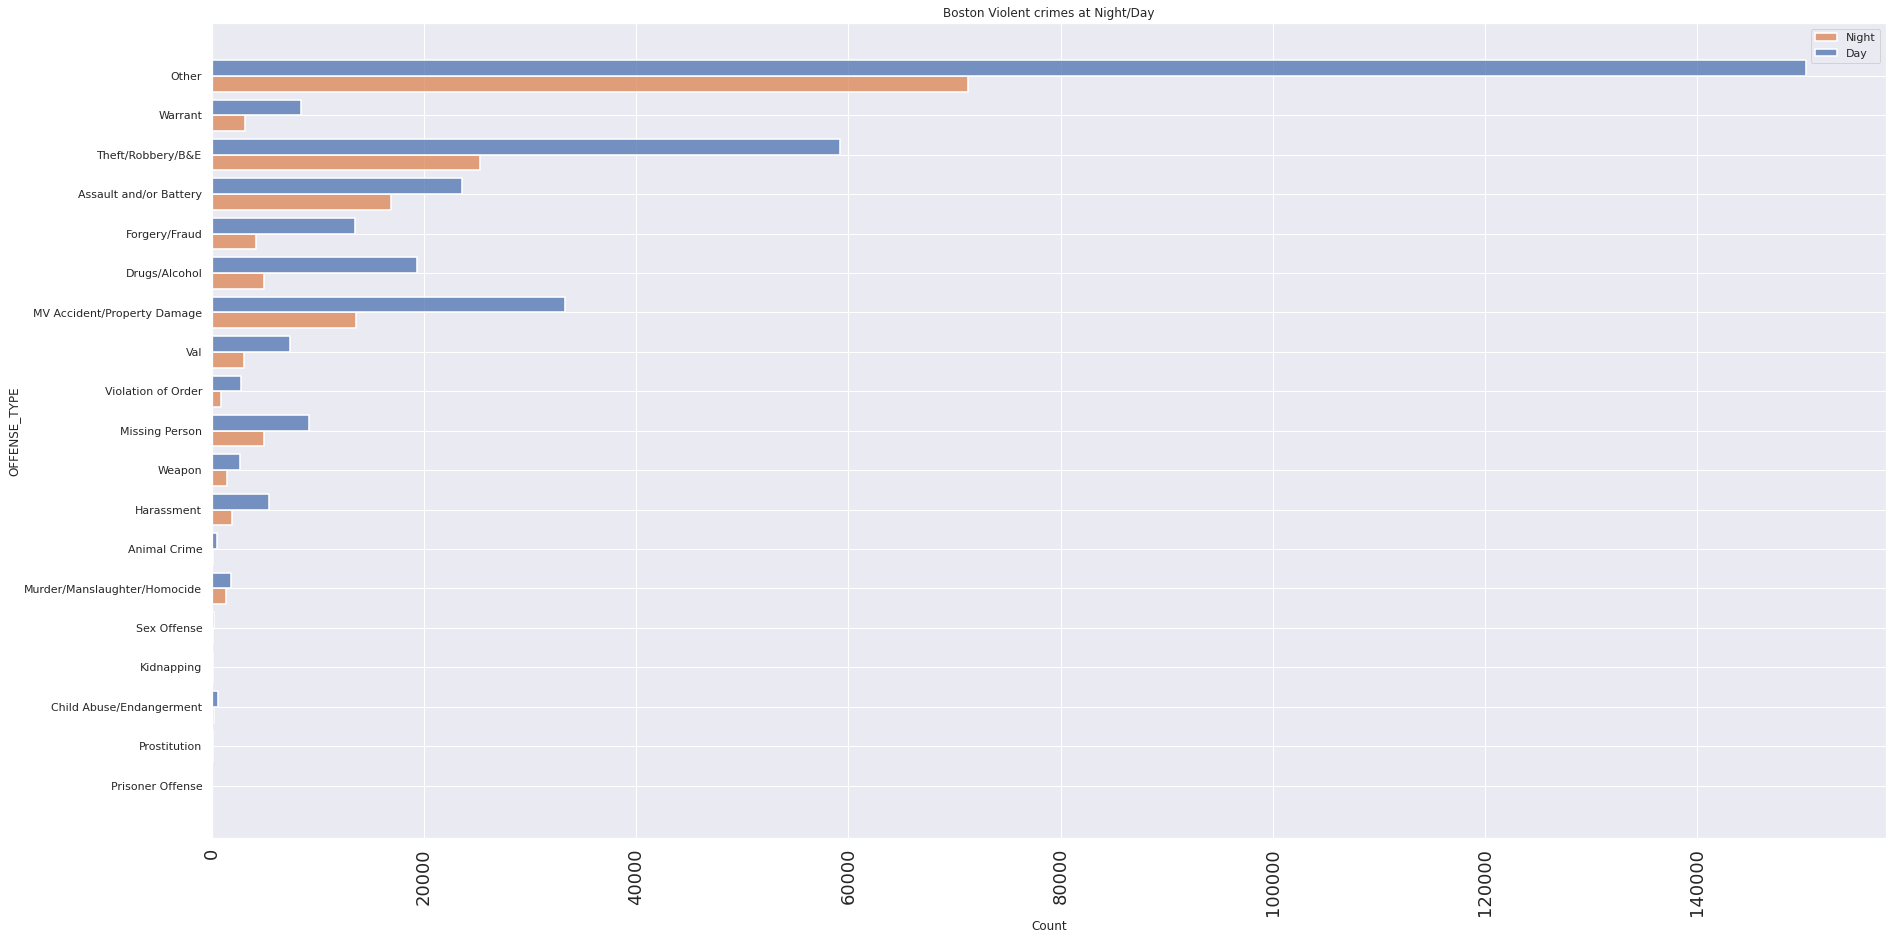

In [96]:
#use in the final notebook 
fig, axs = plt.subplots(1,figsize=(30,15),sharey=False)
g=sns.histplot(boston_df,y='OFFENSE_TYPE', color='y', ax=axs , hue="NIGHT",shrink=.8,multiple="dodge", )
plt.xticks(rotation=90,fontsize=18)
axs.set_title('Boston Violent crimes at Night/Day')
plt.legend(loc='upper right', labels=['Night','Day'])
plt.show()

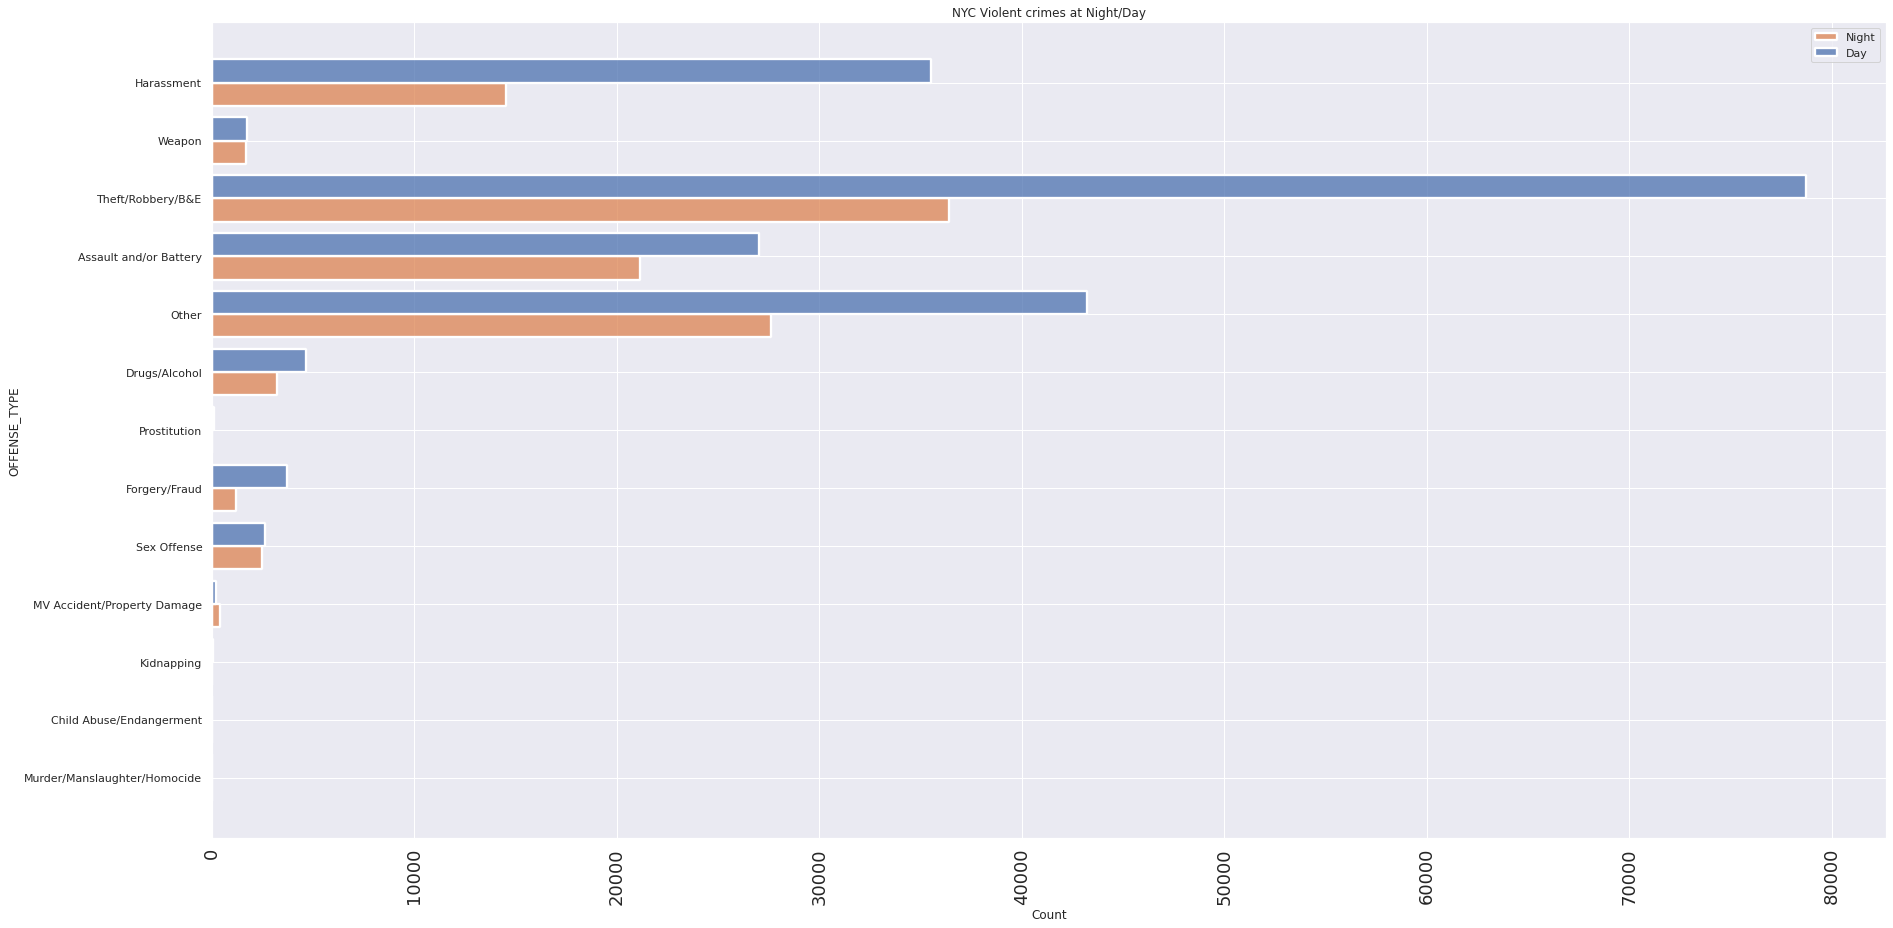

In [97]:
#use in the final notebook 
fig, axs = plt.subplots(1,figsize=(30,15),sharey=False)
g=sns.histplot(nyc_df,y='OFFENSE_TYPE', color='y', ax=axs , hue="NIGHT",shrink=.8,multiple="dodge", )
plt.xticks(rotation=90,fontsize=18)
axs.set_title('NYC Violent crimes at Night/Day')
plt.legend(loc='upper right', labels=['Night','Day'])
plt.show()

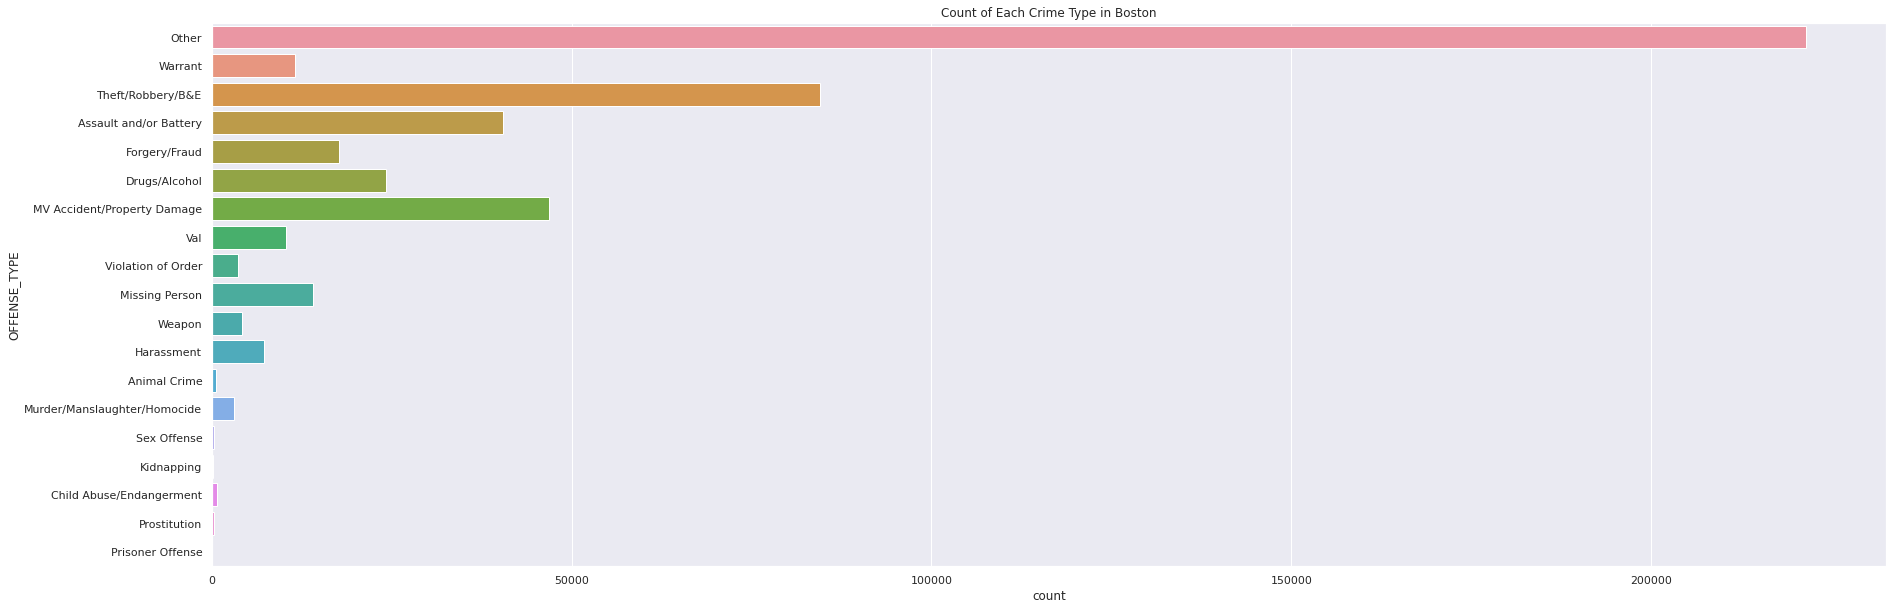

In [78]:
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.countplot(y="OFFENSE_TYPE", data=boston_df)

ax.set_title('Count of Each Crime Type in Boston')

plt.show()

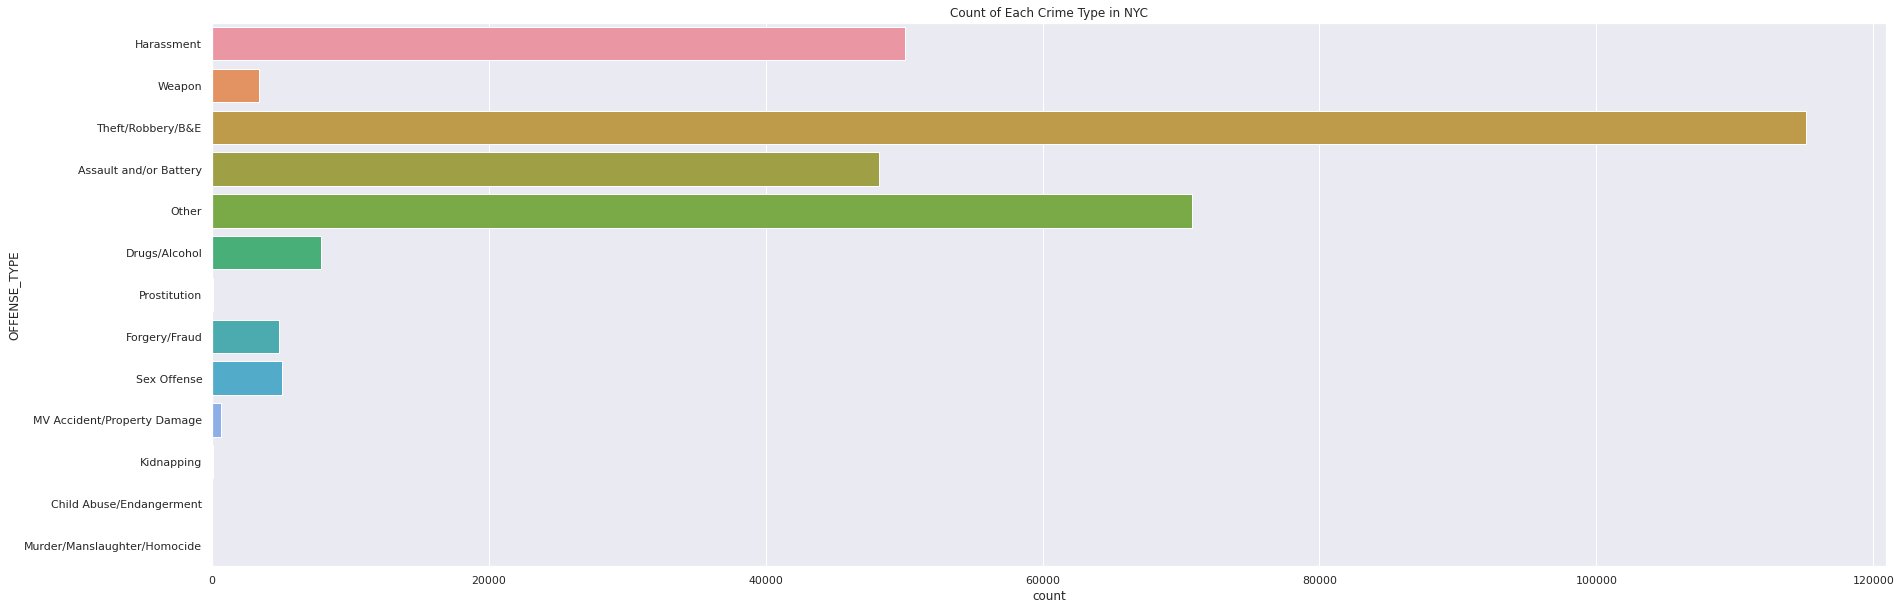

In [10]:
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.countplot(y="OFFENSE_TYPE", data=nyc_df)

ax.set_title('Count of Each Crime Type in NYC')

plt.show()